In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\sudee\Desktop\newtask\car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.shape

(19237, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.drop('ID',axis=1,inplace=True)

Data Cleaning
#univarient analysis

In [6]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
df.dropna(inplace=True)

In [7]:
df['Levy']=df['Levy'].astype('int64')

In [8]:
df.shape

(13418, 17)

In [9]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [10]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [11]:
df['Prod. year'].value_counts()

2014    1885
2012    1744
2013    1589
2015    1420
2016    1378
2011    1344
2010    1196
2017     899
2018     452
2008     411
2009     405
2019     285
2007     179
2020      39
2006      38
2005      34
2004      23
2003      22
2000      15
2001      14
1998      10
1996       9
2002       8
1995       7
1999       4
1997       3
1993       2
1992       1
1965       1
1994       1
Name: Prod. year, dtype: int64

In [12]:
df['Doors'].value_counts()

04-May    13168
02-Mar      216
>5           34
Name: Doors, dtype: int64

In [13]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,10041.000000,10041.000000,10041.000000,10041.000000,1.004100e+04,10041.000000,10041.000000,10041.000000
mean,19542.577134,879.440195,2013.200179,2.170391,4.399148e+05,4.340604,3.965342,6.924111
std,20217.792748,458.772939,3.162240,0.753016,2.363823e+07,0.962604,0.279787,4.119483
min,1.000000,87.000000,1965.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,7840.000000,640.000000,2011.000000,1.700000,6.270700e+04,4.000000,4.000000,4.000000
50%,15681.000000,779.000000,2013.000000,2.000000,1.089810e+05,4.000000,4.000000,4.000000
75%,25264.000000,1018.000000,2015.000000,2.500000,1.610520e+05,4.000000,4.000000,12.000000
max,872946.000000,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [16]:
df['Wheel'].value_counts()

Left wheel          9734
Right-hand drive     307
Name: Wheel, dtype: int64

In [17]:
df['Color'].value_counts()

White            2474
Black            2453
Silver           1943
Grey             1390
Blue              718
Red               367
Orange            183
Brown             110
Green              87
Carnelian red      83
Yellow             62
Golden             58
Sky blue           50
Beige              41
Pink               12
Purple             10
Name: Color, dtype: int64

In [18]:
df['Gear box type'].value_counts()

Automatic    8054
Tiptronic    1372
Manual        325
Variator      290
Name: Gear box type, dtype: int64

In [19]:
df['Model'].value_counts()

Sonata          770
Elantra         647
Prius           524
Santa FE        475
Camry           459
               ... 
GLK 300           1
RAV 4 XLE         1
100 NX            1
A3 4X4            1
Prius C aqua      1
Name: Model, Length: 793, dtype: int64

In [20]:
df['Drive wheels'].value_counts()

Front    8063
4x4      1391
Rear      587
Name: Drive wheels, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

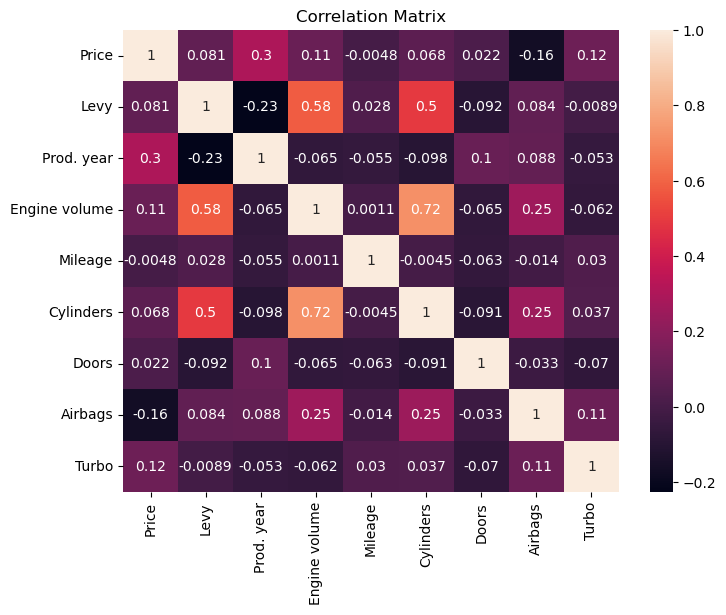

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Lets define the continous columns
cont_col = ['Price', 'Levy',  'Engine volume', 'Mileage', 'Airbags']

In [24]:
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,
                                         np.where(df[col_name]< fence_low, fence_low,
                                                  df[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
df = outlier_handle(df, cont_col)

In [25]:
numerical = df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
0,13328.0,1399.0,2010,3.5,186005.0,6.0,4,12.0
1,16621.0,1018.0,2011,3.0,192000.0,6.0,4,8.0
3,3607.0,862.0,2011,2.5,168966.0,4.0,4,0.0
4,11726.0,446.0,2014,1.3,91901.0,4.0,4,4.0
5,39493.0,891.0,2016,2.0,160931.0,4.0,4,4.0


In [26]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
0,-0.354397,1.814447,-1.012048,2.202200,0.855205,1.723947,0.123879,1.232228
1,-0.124850,0.554635,-0.695801,1.394622,0.932792,1.723947,0.123879,0.261184
2,-1.032026,0.038807,-0.695801,0.587044,0.634684,-0.353853,0.123879,-1.680904
3,-0.466069,-1.336736,0.252941,-1.351142,-0.362698,-0.353853,0.123879,-0.709860
4,1.469506,0.134698,0.885436,-0.220534,0.530695,-0.353853,0.123879,-0.709860


In [27]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,Left wheel,White


In [28]:
categorical.nunique()

Manufacturer         49
Model               793
Category             10
Leather interior      2
Fuel type             6
Gear box type         4
Drive wheels          3
Wheel                 2
Color                16
dtype: int64

In [29]:
categorical.drop('Model',axis=1,inplace=True)

In [30]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

C:\Users\sudee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DAIHATSU,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
cars = pd.concat([df_num, df_cat], axis=1)

cars.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_AUDI,Manufacturer_BENTLEY,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,-0.354397,1.814447,-1.012048,2.202200,0.855205,1.723947,0.123879,1.232228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.124850,0.554635,-0.695801,1.394622,0.932792,1.723947,0.123879,0.261184,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.032026,0.038807,-0.695801,0.587044,0.634684,-0.353853,0.123879,-1.680904,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.466069,-1.336736,0.252941,-1.351142,-0.362698,-0.353853,0.123879,-0.709860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.469506,0.134698,0.885436,-0.220534,0.530695,-0.353853,0.123879,-0.709860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
y = cars.pop('Price')

X = cars

In [33]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7028, 91) (7028,)
(3013, 91) (3013,)


In [35]:
# Building the first model with all the features

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_pred = regressor.predict(X_train)

In [37]:
y_test_pred = regressor.predict(X_test)

In [38]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
7182,-0.025586,0.465580
3723,0.399840,0.084078
6110,1.033832,0.439058
3129,0.603178,0.415291
1925,1.237588,0.716266


In [39]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  6317451398.733654
Mean Squared Error:  4.538717254283495e+22
Root Mean Squared Error:  213042654280.39276


In [40]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))

dump(encoder, open('models/onehot_encoder.pkl', 'wb'))
dump(regressor, open('models/lr_model.pkl', 'wb'))